<a href="https://colab.research.google.com/github/yablockoo/GB/blob/AI/HWAI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построим нейронную сеть(берем простую линейную сеть: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston

In [ ]:
# !pip install --upgrade pip
# !pip install tensorflow

In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [7]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: ")
print(tf.config.experimental.list_physical_devices("GPU"))


print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))

есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X = load_boston().data
y = load_boston().target

In [39]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
x_train = tf.constant(x_train)
x_test = tf.constant(x_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [45]:
normalizer = tf.keras.layers.Normalization(input_shape=[13,], axis=None)

In [158]:
model = Sequential([
    normalizer,
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
                     loss='mean_absolute_error')

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               3         
 n)                                                              
                                                                 
 dense_69 (Dense)            (None, 10)                140       
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 264
Trainable params: 261
Non-trainable params: 3
_________________________________________________________________


In [150]:
model.predict(x_train[:10])

array([[-244.68158],
       [-135.24034],
       [-138.20016],
       [-261.05957],
       [-159.97751],
       [-139.82312],
       [-155.84329],
       [-250.5104 ],
       [-170.84311],
       [-174.62709]], dtype=float32)

In [159]:
%%time
history = model.fit( x_train, 
                    y_train,
                    epochs=200, 
                    verbose=0,
                    batch_size = 20,
                    validation_split=0.2)

CPU times: user 14.2 s, sys: 1.04 s, total: 15.2 s
Wall time: 20.8 s


In [161]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error (MAE)')
  plt.legend()
  plt.grid(True)


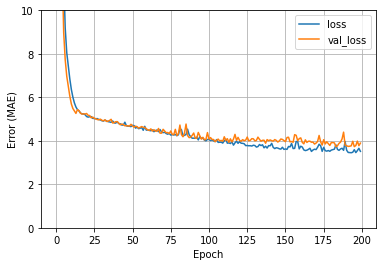

In [162]:
plot_loss(history)


In [163]:
test_results = {}

In [165]:
def model_func(neurons1 = 10, neurons2 = 10, batch_size = 20):
  model = Sequential([
      normalizer,
      Dense(neurons1, activation='relu'),
      Dense(neurons2, activation='relu'),
      Dense(1)
  ])

  model.compile(optimizer='adam',
                loss='mean_absolute_error',
                metrics=['accuracy'])

  history = model.fit( x_train, 
                      y_train,
                      epochs=200, 
                      verbose=0,
                      batch_size = batch_size,
                      validation_split=0.2)
  test_results[f'model n1:{neurons1},n2:{neurons2},batch:{batch_size}'] = model.evaluate(x_test, y_test, verbose=0)

In [166]:
model_func(100, 100)
model_func(50, 50)
model_func(15, 15)
model_func(0, 10)
model_func(0, 0)
model_func(batch_size=30)
model_func(batch_size=50)
model_func(batch_size=100)

In [174]:
pd.DataFrame(test_results, index=['Mean absolute error [MAE]','нолики']).T

,Mean absolute error [MAE],нолики
"model n1:100,n2:100,batch:20",3.121611,0.0
"model n1:50,n2:50,batch:20",3.456655,0.0
"model n1:15,n2:15,batch:20",3.468035,0.0
"model n1:0,n2:10,batch:20",18.843733,0.0
"model n1:0,n2:0,batch:20",18.843733,0.0
"model n1:10,n2:10,batch:30",4.360874,0.0
"model n1:10,n2:10,batch:50",3.798891,0.0
"model n1:10,n2:10,batch:100",4.385276,0.0
